# Data prep.

In [1]:
import pandas as pd
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
df = pd.read_csv(url, names=['sepal length','sepal width','petal length','petal width','target'])
df.head()

,sepal length,sepal width,petal length,petal width,target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [28]:
df['target'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

# Data pre-processing

In [13]:
from sklearn.preprocessing import StandardScaler  # 표준화 패키지 라이브러리 
x = df.drop(['target'], axis=1).values # 독립변인들의 value값만 추출
y = df['target'].values # 종속변인 추출
x = StandardScaler().fit_transform(x) # x객체에 x를 표준화한 데이터를 저장

features = ['sepal length', 'sepal width', 'petal length', 'petal width']
pd.DataFrame(x, columns=features).head()

,sepal length,sepal width,petal length,petal width
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977


# Run PCA

In [22]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2) # 주성분을 몇개로 할지 결정
pca_data = pca.fit_transform(x)
df_pca = pd.DataFrame(data=pca_data, columns = ['PC01', 'PC02'])
print(f"variance coverage: {sum(pca.explained_variance_ratio_) * 100:.2f} %")
# 주성분으로 이루어진 데이터 프레임 구성

variance coverage: 95.80 %


# Visualize PCA

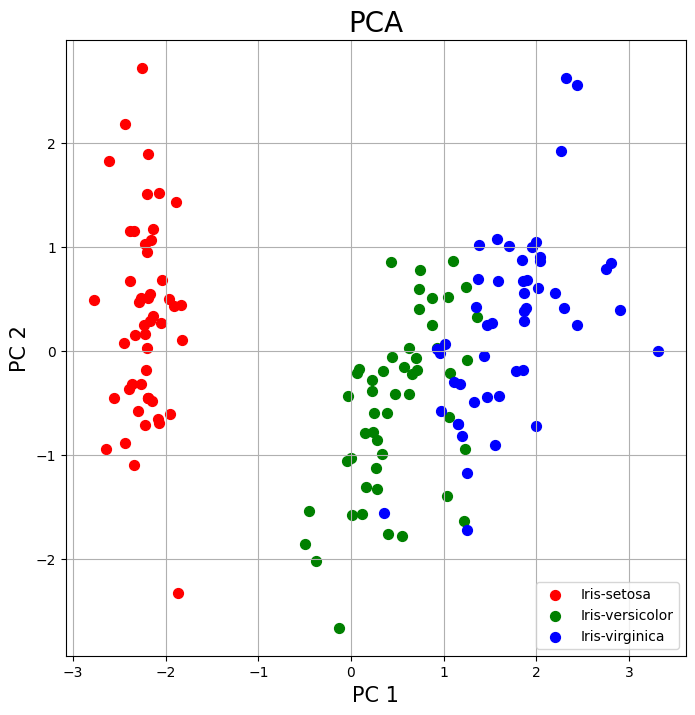

In [30]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (8, 8))
ax = fig.add_subplot(1, 1, 1)
ax.set_xlabel('PC 1', fontsize = 15)
ax.set_ylabel('PC 2', fontsize = 15)
ax.set_title('PCA', fontsize=20)

targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = df['target'] == target
    ax.scatter(df_pca.loc[indicesToKeep, 'PC01']
               , df_pca.loc[indicesToKeep, 'PC02']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()